In [16]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import numpy as np
# if using a Jupyter notebook, includue:
%matplotlib inline

In [6]:
DATA_DIR = "../data"
def get_data_dir(name):
    return os.path.join(DATA_DIR, name)

lucy_mmr = pd.read_csv(get_data_dir("core_mmr_games.csv"))

players = pd.read_csv(get_data_dir("players.csv"))
players = players[players["internal_role"] < 50]
players = players[~players["functional_role"].isna()]
games = pd.read_csv(get_data_dir("games.csv"))
games = games[games["outcome"].isin([0, 1])]
handles = pd.read_csv(get_data_dir("handles.csv"))
mmr_games = players.merge(games, on="game_id").merge(handles, on="player_handle", how="left")
mmr_games['battle_tag'].fillna(mmr_games["player_handle"], inplace=True)
mmr_games['identity'] = mmr_games['battle_tag']
roles = pd.read_csv(get_data_dir("roles.csv"))
mmr_games = mmr_games[(mmr_games["team"].isin((0, 1)))].merge(roles[["role", "role_name"]], left_on="functional_role", right_on="role")


In [7]:
mmr_games

game_id player_name    player_handle  win_status  pregame_mmr  \
0       000326528171f0f   YugoWeeda  2-S2-1-10155145           1         1108   
1       0037faaec6b461f       nikuo  1-S2-1-10484446          -1         1899   
2       0046979be6ee21d     mihahaz   2-S2-1-8624341           1         1303   
3       0046eb3d9b04424  MrMakookoo   1-S2-1-9957224           0         1116   
4       00512f6b0a81fa9  DarkShadow   2-S2-1-5018362           1          895   
...                 ...         ...              ...         ...          ...   
108046  92be5abb83e1fc8     Archlei  1-S2-1-11669725           1         1583   
108047  9967ce3750c85f3     Archlei  1-S2-1-11669725           1         1570   
108048  f9a4256b46b42ca     Archlei  1-S2-1-11669725           1         1579   
108049  823cf19d666b2aa   DaProphet   1-S2-1-5730831           1         2254   
108050  e68df3e2b466181        olly   1-S2-1-3245658          -1         1633   

        postgame_mmr  internal_role  death_time  total_credits  team  ...  \
0               1112             18          -1             17     0  ...   
1               1823             18         718           3116     0  ...   
2               1309             18          -1           1861     0  ...   
3               1086             18         984             40     0  ...   
4                895             18          -1            142     0  ...   
...              ...            ...         ...            ...   ...  ...   
108046          1583             39          -1           9123     0  ...   
108047          1579             39          -1           9124     0  ...   
108048          1586             39         984           9124     0  ...   
108049          2264             15          -1           4349     0  ...   
108050          1597             15          -1           3822     0  ...   

        anticancer_mean game_mode  replay_version  recorded_game  \
0                   113         3               9            NaN   
1                   115         3              14            1.0   
2                   133         3               9            NaN   
3                    98         3              14            1.0   
4                   125         3              14            1.0   
...                 ...       ...             ...            ...   
108046              129         3              14            1.0   
108047              129         6              14            1.0   
108048              128         6              14            1.0   
108049              124         3               9            NaN   
108050              124         3               9            NaN   

                       ds_y         battle_tag                   ds  \
0       2022-05-25 17:55:59     YugoWeeda#2166  2022-05-18 01:59:28   
1       2022-07-01 18:42:07        nikuo#11948  2022-05-11 07:09:42   
2       2022-05-25 16:45:30  michal082006#2452  2022-05-11 14:51:14   
3       2022-07-01 16:46:53     BigSmoke#11973  2022-06-09 23:45:40   
4       2022-07-02 18:13:31   DarkShadow#25200  2022-06-12 19:25:09   
...                     ...                ...                  ...   
108046  2022-07-10 00:32:23       Archlei#1931  2022-05-11 07:09:42   
108047  2022-07-10 03:29:42       Archlei#1931  2022-05-11 07:09:42   
108048  2022-07-10 03:29:42       Archlei#1931  2022-05-11 07:09:42   
108049  2022-05-30 18:00:18       Shadow#16756  2022-05-11 07:09:42   
108050  2022-06-07 02:11:01          Olly#1848  2022-05-12 05:47:38   

                 identity role  role_name  
0          YugoWeeda#2166   18     Warden  
1             nikuo#11948   18     Warden  
2       michal082006#2452   18     Warden  
3          BigSmoke#11973   18     Warden  
4        DarkShadow#25200   18     Warden  
...                   ...  ...        ...  
108046       Archlei#1931   39  SgtHammer  
108047       Archlei#1931   39  SgtHammer  
108048       Archlei#1931   39  SgtHammer  
108049  

In [8]:
player_data = mmr_games[["game_id", "identity", "role_name", "outcome", "team", "game_mode", "leave_time"]]
updated_mmr_data = player_data.merge(lucy_mmr, on=["game_id", "identity"])

In [9]:
avg_game_mmrs = updated_mmr_data.groupby("game_id")["mmr"].mean().reset_index()
avg_game_mmrs[avg_game_mmrs["mmr"] > 1900]

game_id          mmr
30     00af27deaff0136  2137.050835
139    03530f2d3f61f63  1924.831863
162    03e3abde5a6d650  1904.957540
234    0550a26bab828bb  2154.594210
267    060934b9d0d6932  2048.629022
...                ...          ...
10624  f9a4256b46b42ca  2091.426163
10668  fa931f056799307  2141.745571
10684  faf3cb58423556b  2121.828609
10720  fbccc97ac7ddb12  2120.179335
10754  fc84df1ce7dce85  2141.586398

[198 rows x 2 columns]

In [10]:
premades = avg_game_mmrs[avg_game_mmrs["mmr"] > 1900][["game_id"]].merge(updated_mmr_data, on =["game_id"])

In [11]:
premades.to_csv(get_data_dir("premades.csv"), index=False)

In [12]:
np.mean(premades.groupby("game_id")["outcome"].max())

0.41414141414141414

In [24]:
durations = mmr_games.groupby(["game_id"])["leave_time"].max().reset_index()["leave_time"] / 60
durations = [d for d in durations if d < 100]

(array([ 113.,  595., 3451., 4622., 1565.,  395.,  105.,   42.,   15.,
           6.]),
 array([-1.66666667e-02,  9.66500000e+00,  1.93466667e+01,  2.90283333e+01,
         3.87100000e+01,  4.83916667e+01,  5.80733333e+01,  6.77550000e+01,
         7.74366667e+01,  8.71183333e+01,  9.68000000e+01]),
 <BarContainer object of 10 artists>)

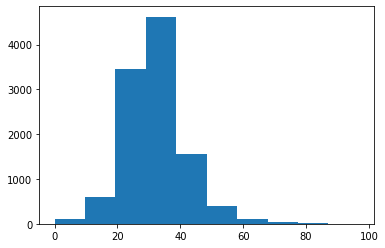

In [25]:
plt.hist(durations)
